In [5]:
import pandas as pd
import numpy as np

In [14]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

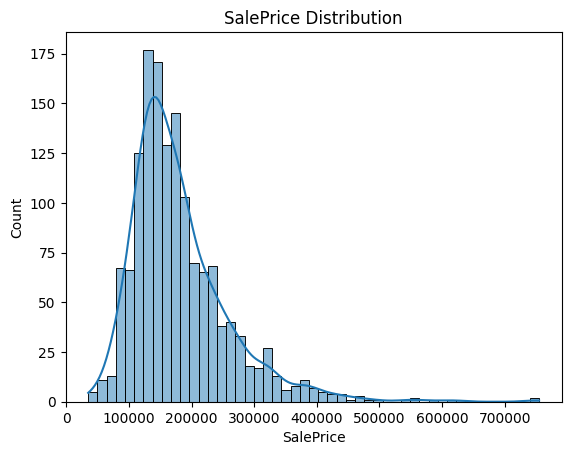

In [3]:
# ÌÉÄÍ≤ü Î∂ÑÌè¨
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.show()



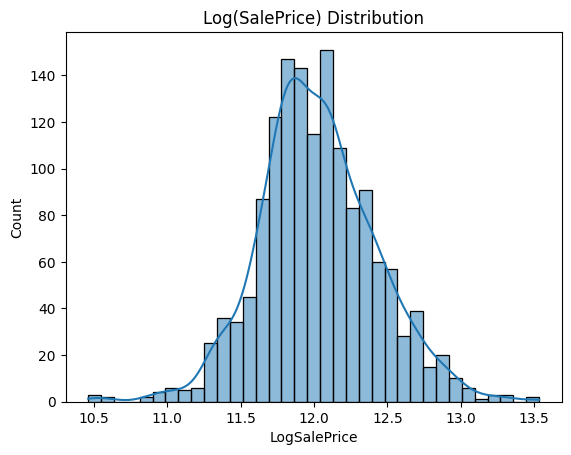

In [ ]:
# ‚úîÔ∏è Ï†ïÍ∑úÏÑ± ÌåêÎã®Ïö© ÏãúÍ∞ÅÌôî (Î°úÍ∑∏ Î≥ÄÌôò)
train['LogSalePrice'] = np.log1p(train['SalePrice'])

sns.histplot(train['LogSalePrice'], kde=True)
plt.title("Log(SalePrice) Distribution")
plt.show()

In [16]:
len(train)

1460

In [17]:
# Í≤∞Ï∏°Ïπò ÎßéÏùÄ Ïª¨Îüº ÏÉÅÏúÑ 10Í∞ú
nulls = train.isnull().sum().sort_values(ascending=False)
print(nulls[nulls > 0].head(10))

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
dtype: int64


In [9]:
# ÏàòÏπò, Î≤îÏ£ºÌòï Ïª¨Îüº Î∂ÑÎ¶¨
numerical_feats = train.select_dtypes(include=['int64', 'float64']).columns
categorical_feats = train.select_dtypes(include=['object']).columns

print("ÏàòÏπòÌòï Î≥ÄÏàò Í∞úÏàò:", len(numerical_feats))
print("Î≤îÏ£ºÌòï Î≥ÄÏàò Í∞úÏàò:", len(categorical_feats))

ÏàòÏπòÌòï Î≥ÄÏàò Í∞úÏàò: 39
Î≤îÏ£ºÌòï Î≥ÄÏàò Í∞úÏàò: 43


In [10]:
# ÏàòÏπòÌòï Ïª¨Îüº Ï§ëÏóêÏÑú SalePriceÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
corr_matrix = train[numerical_feats].corr()
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(10)

print("SalePriceÏôÄ ÏÉÅÍ¥Ä ÎÜíÏùÄ Î≥ÄÏàò:")
print(top_corr)

SalePriceÏôÄ ÏÉÅÍ¥Ä ÎÜíÏùÄ Î≥ÄÏàò:
SalePrice       1.000000
LogSalePrice    0.948374
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


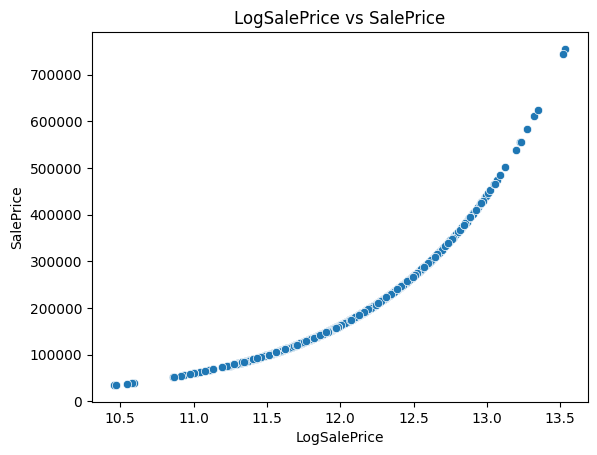

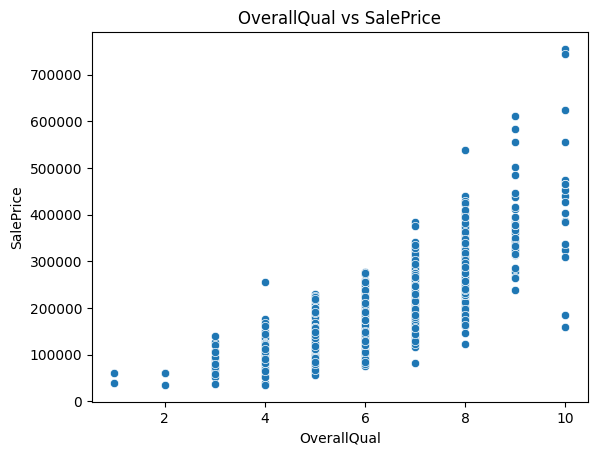

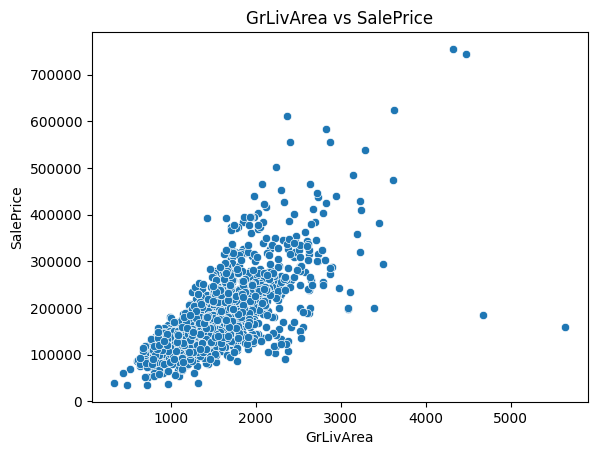

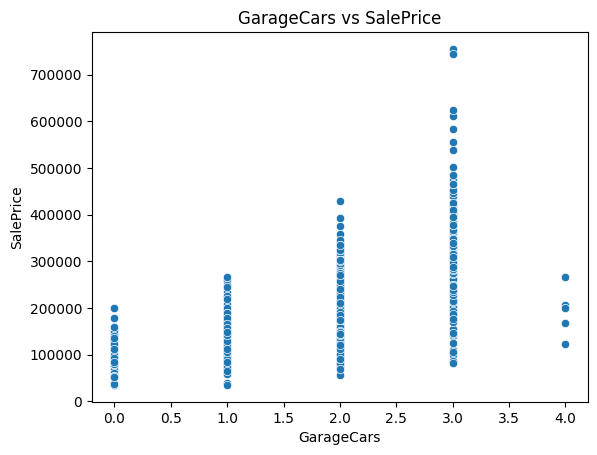

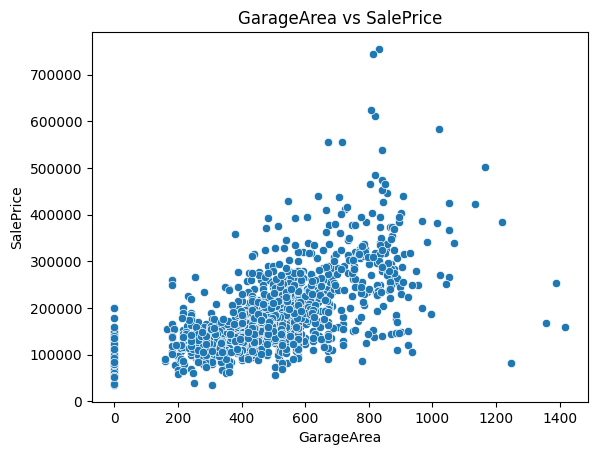

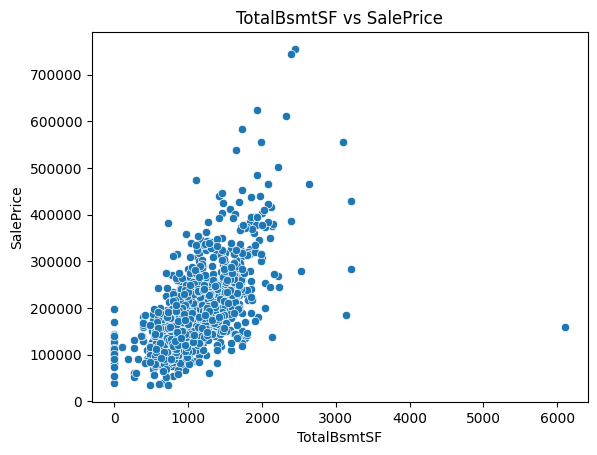

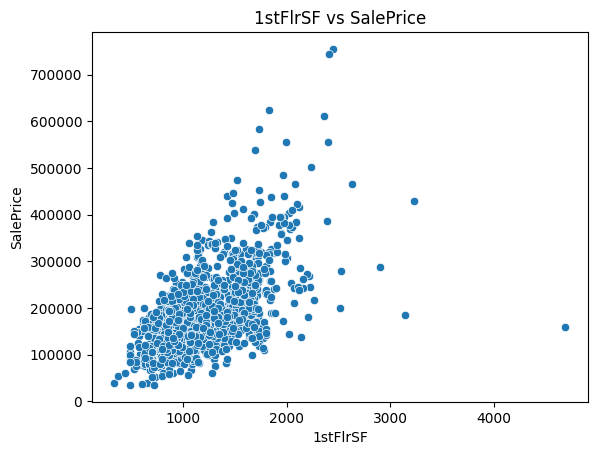

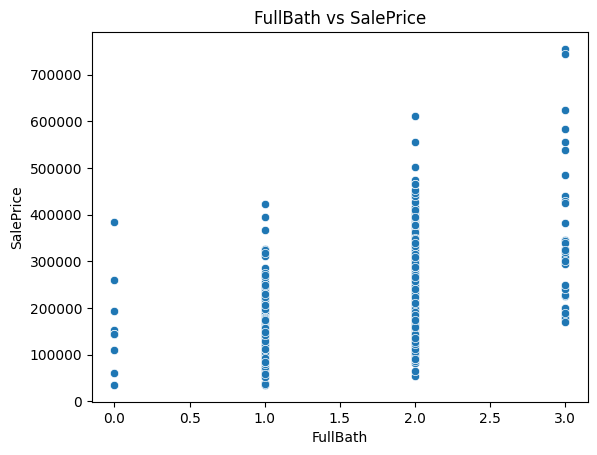

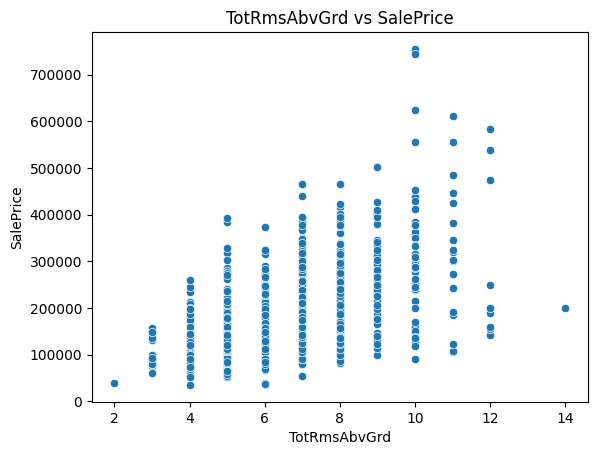

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

top_features = top_corr.index.drop("SalePrice")  # ÏûêÍ∏∞ ÏûêÏã†ÏùÄ Ï†úÏô∏

for col in top_features:
    sns.scatterplot(data=train, x=col, y='SalePrice')
    plt.title(f"{col} vs SalePrice")
    plt.show()

## üîö Í≤∞Î°†: ÌîºÏ≤ò Ìï¥ÏÑù Ï†ïÎ¶¨

| Feature       | Ïú†ÏùòÎØ∏Ìï®       | Ïù¥ÏÉÅÏπò ÏûàÏùå?     | Î≥ÄÌôò Ï∂îÏ≤ú                       |
|---------------|----------------|------------------|---------------------------------|
| OverallQual   | ‚úÖ Îß§Ïö∞ Ï§ëÏöî    | ‚ùå               | ‚ùå (Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©)                |
| GrLivArea     | ‚úÖ              | ‚úÖ               | ‚úÖ Î°úÍ∑∏Î≥ÄÌôò                     |
| GarageCars    | ‚úÖ              | ‚ùó ÏùºÎ∂Ä           | ‚ùå                              |
| GarageArea    | ‚úÖ              | ‚úÖ               | ‚ùå                              |
| TotalBsmtSF   | ‚úÖ              | ‚ùó 0 ÏûàÏùå         | ‚úÖ Î°úÍ∑∏Î≥ÄÌôò or ÌååÏÉù Î≥ÄÏàò       |
| 1stFlrSF      | ‚úÖ              | ‚úÖ               | ‚ùå                              |
| FullBath      | ‚úÖ              | ‚ùó Î∂ÑÏÇ∞ ÌÅº        | ‚ùå                              |
| TotRmsAbvGrd  | ‚≠ï ÏïΩÌï®         | ‚ùó Î¨¥ÏùòÎØ∏Ìïú Ï¶ùÍ∞Ä   | ‚ùå                              |

In [19]:
train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [20]:
# ÏàòÏπòÌòï ÌîºÏ≤ò Ï§ë ÏÉÅÍ¥Ä ÎÜíÏùÄ Ïª¨Îüº Ï∂îÏ∂ú (SalePrice, LogSalePrice Ï†úÏô∏)
top_corr_feats = corr_matrix['SalePrice'].drop(['SalePrice', 'LogSalePrice']).sort_values(ascending=False).head(10)
print(top_corr_feats)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [22]:
selected_numerical = top_corr_feats.index.tolist()
print(selected_numerical)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


In [25]:
# ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ 
import os
import matplotlib.pyplot as plt
# ÏúàÎèÑÏö∞ Í∏∞Î≥∏ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Ïòà: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'


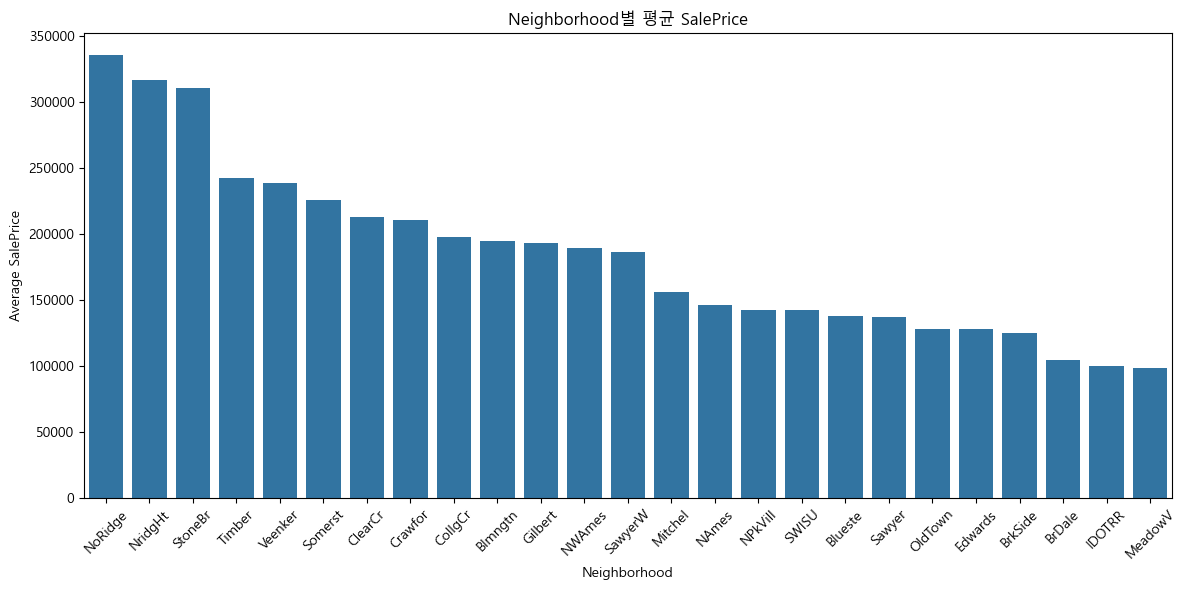

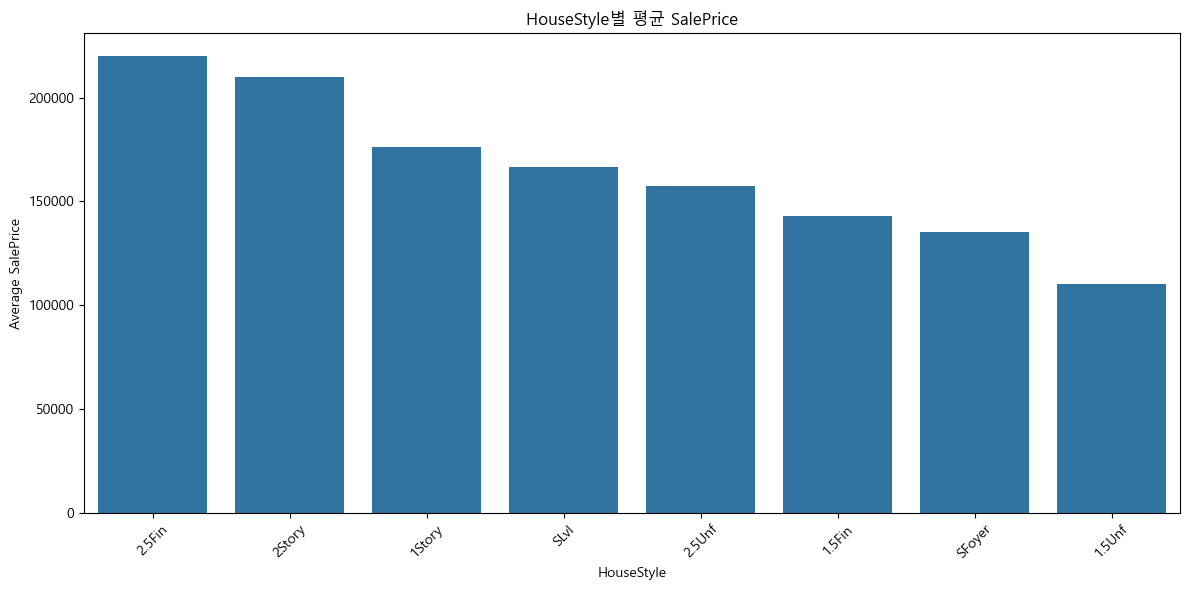

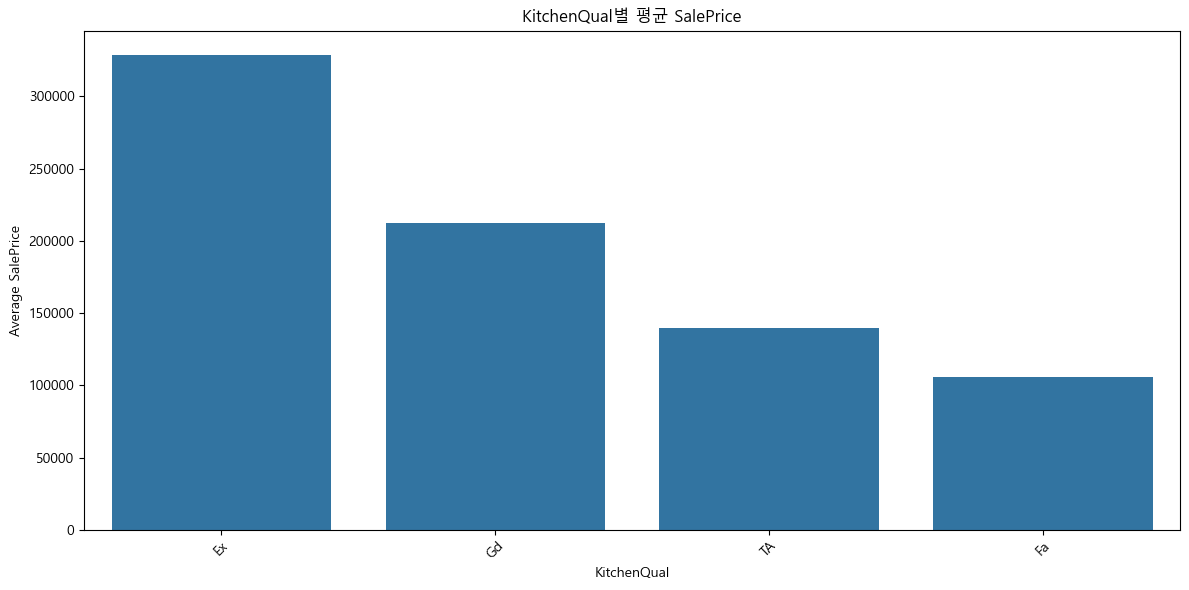

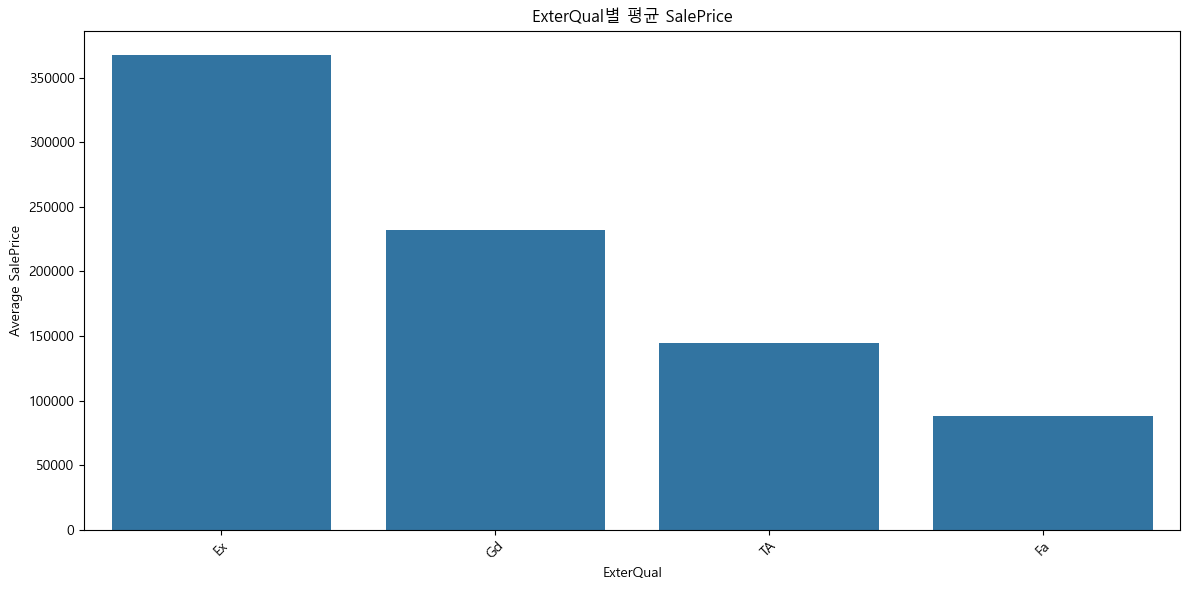

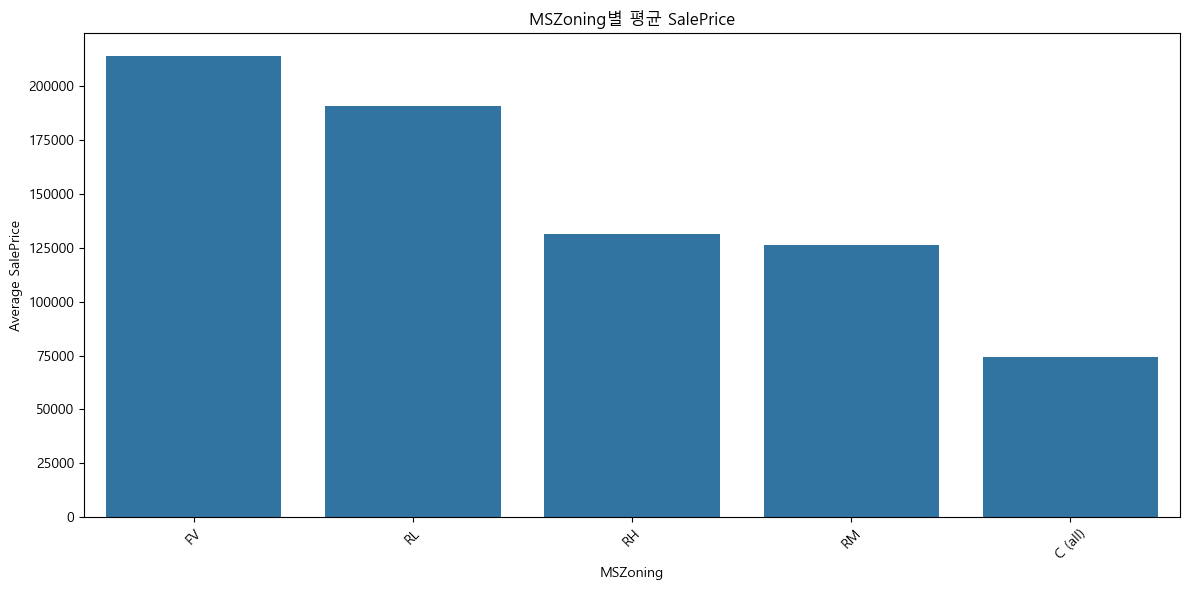

In [26]:
selected_categorical = ['Neighborhood', 'HouseStyle', 'KitchenQual', 'ExterQual', 'MSZoning']

for col in selected_categorical:
    # Î≤îÏ£ºÎ≥Ñ ÌèâÍ∑† SalePrice Í≥ÑÏÇ∞
    mean_prices = train.groupby(col)['SalePrice'].mean().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=mean_prices.index, y=mean_prices.values)
    plt.xticks(rotation=45)
    plt.title(f"{col}Î≥Ñ ÌèâÍ∑† SalePrice")
    plt.ylabel("Average SalePrice")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:
# üîç Ìï¥ÏÑù Î∞©Î≤ï Î∞è Ïù∏ÏÇ¨Ïù¥Ìä∏ ÏòàÏãú
# 1. Neighborhood (ÏßÄÏó≠)
# NoRidge, NridgHt, StoneBr Îì±Ïùò ÏßÄÏó≠ÏùÄ ÌèâÍ∑† ÏßëÍ∞íÏù¥ ÎÜíÍ≥†,

# MeadowV, IDOTRR Îì±ÏùÄ ÌèâÍ∑† ÏßëÍ∞íÏù¥ ÎÇÆÏïÑ.

# üëâ Ïù¥Í±¥ Î™®Îç∏Ïóê Ï†ÅÏö© Ïãú ÏßÄÏó≠Î≥Ñ ÎçîÎØ∏ Î≥ÄÏàò(One-hot encoding) ÏÉùÏÑ±ÌïòÍ±∞ÎÇò Í≥†Í∞Ä/Ï§ëÍ∞Ä/Ï†ÄÍ∞Ä ÏßÄÏó≠ÏúºÎ°ú Î¨∂Ïñ¥ ÌååÏÉù Î≥ÄÏàòÎ°ú ÎßåÎì§Ïñ¥ÎèÑ Ï¢ãÏïÑ.

# 2. HouseStyle (Ï£ºÌÉù Ïú†Ìòï)
# 2.5FinÍ≥º 2Story Ï£ºÌÉùÏùò ÌèâÍ∑† Í∞ÄÍ≤©Ïù¥ ÎÜíÍ≥†, 1.5Unf, SFoyerÎäî ÎÇÆÏùÄ Ìé∏.

# üëâ Ï£ºÌÉù Íµ¨Ï°∞ Ïó≠Ïãú Í∞ÄÍ≤©Í≥º Í¥ÄÎ†®ÏÑ±Ïù¥ ÏûàÏúºÎØÄÎ°ú Ï§ëÏöîÌïú ÌîºÏ≤òÎ°ú Í∞ÑÏ£ºÌï† Ïàò ÏûàÏñ¥.

# 3. KitchenQual (Ï£ºÎ∞© ÌíàÏßà)
# Ex > Gd > TA > Fa ÏàúÏúºÎ°ú Í∞ÄÍ≤©Ïù¥ ÎöúÎ†∑ÌïòÍ≤å Îã¨ÎùºÏ†∏.

# üëâ Ïù¥Í±¥ Î™ÖÌôïÌïú ÏàúÏÑúÌòï Î≥ÄÏàòÏù¥ÎØÄÎ°ú, Label Encoding Ï≤òÎ¶¨Î•º Ìï† Ïàò ÏûàÍ≥†, Î™®Îç∏Ïù¥ Ïûò ÌôúÏö©Ìï† Ïàò ÏûàÎäî ÌîºÏ≤òÏïº.

# 4. ExterQual (Ïô∏Î∂Ä ÏûêÏû¨ ÌíàÏßà)
# KitchenQualÍ≥º ÎπÑÏä∑ÌïòÍ≤å ÌíàÏßà Îì±Í∏âÏóê Îî∞Îùº ÏßëÍ∞íÏù¥ Ï∞®Ïù¥ ÎÇò.

# üëâ ÏàúÏÑúÌòï Ïù∏ÏΩîÎî© + ÌååÏÉùÎ≥ÄÏàòÎ°úÎèÑ ÌôúÏö© Í∞ÄÎä•.

# 5. MSZoning (Ïö©ÎèÑ Íµ¨Î∂Ñ)
# FV, RL Í∞ôÏùÄ Ïö©ÎèÑÏùºÏàòÎ°ù ÎÜíÏùÄ Í∞ÄÍ≤©ÎåÄÍ∞Ä ÌòïÏÑ±ÎêòÏñ¥ ÏûàÍ≥†, C (all)ÏùÄ ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÎÇÆÏùÄ Ìé∏Ïù¥Ïïº.

# üëâ ÏßÄÏó≠ zoningÎèÑ Ï§ëÏöîÌïú Î≥ÄÏàòÏûÑÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌôïÏù∏Ìï† Ïàò ÏûàÏñ¥.